In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wnba = pd.read_csv("WNBA Stats.csv")

In [4]:
# On average, an WNBA player played approximately 497 minutes in the 2016-2017 season:
wnba['MIN'].mean()

496.97202797202794

In [6]:
wnba["Age"].mean()

27.076923076923077

In [7]:
# apply ordinal values to age with new column
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')

In [8]:
#apply ordinal values to minutes played column
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

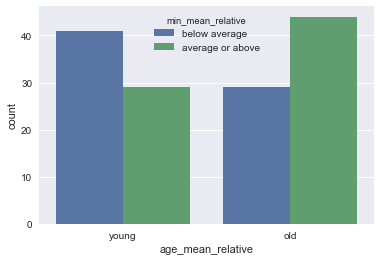

In [12]:
#use seaborn to generate a grouped bar blot
sns.countplot(x='age_mean_relative', hue='min_mean_relative', data=wnba)

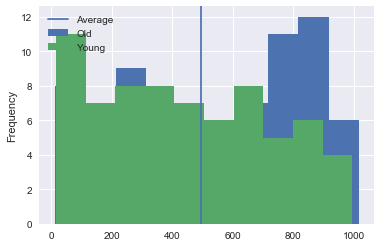

In [37]:
#need more granularity - use MINs column

wnba[wnba["Age"] >=27]["MIN"].plot.hist(label="Old", legend=True)
wnba[wnba['Age']< 27]['MIN'].plot.hist(label='Young', legend=True)
plt.axvline(x=wnba['MIN'].mean(), label = 'Average') #creates the vertical average bar
plt.legend()

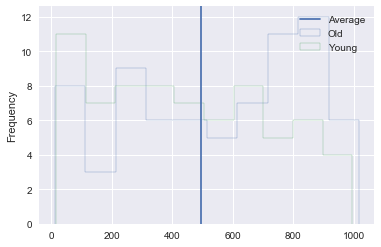

In [36]:
# add histtype to make bars transparent

wnba[wnba["Age"] >=27]["MIN"].plot.hist(histtype='step',label="Old", legend=True)
wnba[wnba['Age']< 27]['MIN'].plot.hist(histtype='step',label='Young', legend=True)
plt.axvline(x=wnba['MIN'].mean(), label = 'Average') #creates the vertical average bar
plt.legend()

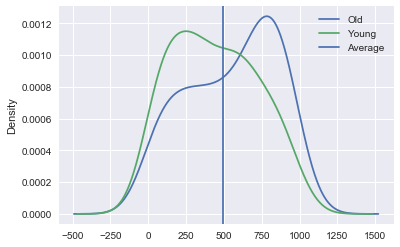

In [34]:
# kernal density plot
wnba[wnba["Age"] >=27]["MIN"].plot.kde(label="Old", legend=True)
wnba[wnba['Age']< 27]['MIN'].plot.kde(label='Young', legend=True)
plt.axvline(x=wnba['MIN'].mean(), label = 'Average') #creates the vertical average bar
plt.legend()

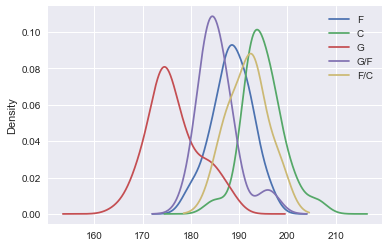

In [40]:
# height and position 
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

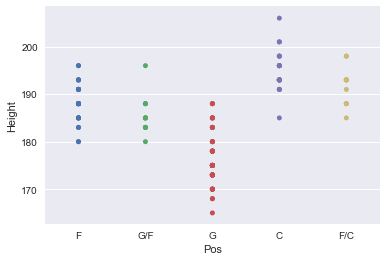

In [41]:
sns.stripplot(x='Pos', y='Height', data=wnba)

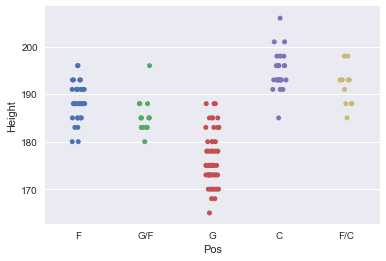

In [42]:
# bullet points overlap. Fix this by adding jitter to distribution 
sns.stripplot(x='Pos', y='Height', data=wnba, jitter=True)

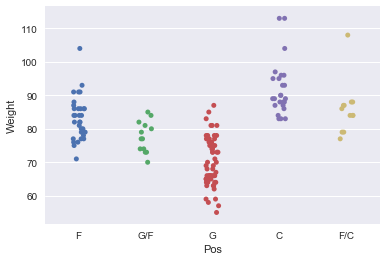

In [43]:
sns.stripplot(x='Pos',y='Weight',data=wnba,jitter=True)

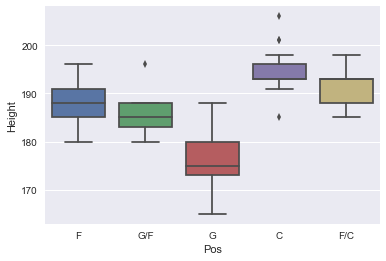

In [44]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

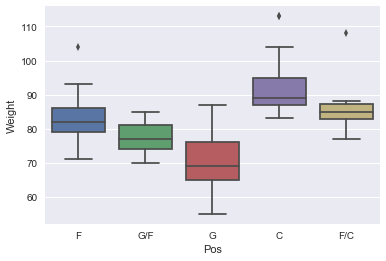

In [45]:
sns.boxplot(x='Pos', y='Weight', data=wnba)

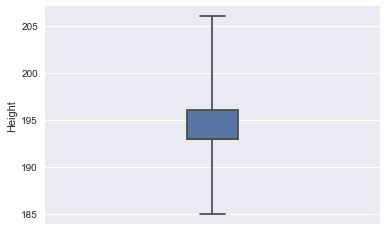

In [46]:
# whis parameter allows one to adjust including or exluding outliers
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4,orient = 'vertical', width = .15)

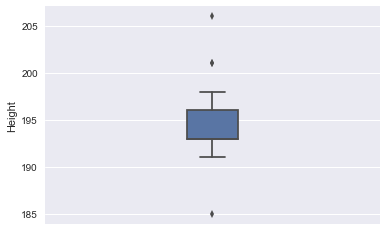

In [47]:
# without whis = 4 we are using default outlier setting which is 1.5x the interquartile range
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], orient = 'vertical', width = .15)

In [50]:
# iqr = interquartile range
iqr = wnba['Games Played'].describe()[6] - wnba['Games Played'].describe()[4]
lower_bound = wnba['Games Played'].describe()[4] - (iqr * 1.5)
upper_bound = wnba['Games Played'].describe()[6] + (iqr * 1.5)

In [51]:
upper_bound

39.5

In [58]:
iqr = int(wnba['Games Played'].describe()[6] - wnba['Games Played'].describe()[4])

lower_bound = float(wnba['Games Played'].describe()[4]) - (iqr * 1.5)
upper_bound = float(wnba['Games Played'].describe()[6]) + (iqr * 1.5)

outliers_high = 0
outliers_low = 0

for i in wnba['Games Played']:
    if i > upper_bound:
        outliers_high += 1
    if i < lower_bound:
        outliers_low += 1

In [59]:
lower_bound

11.5

In [60]:
upper_bound

39.5